In [1]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score as acc
import numpy as np

### Coffee Data Set

In [3]:
coffee_train = pd.read_csv('coffee_train.csv', sep=',', header=None).astype(float)
coffee_train_y = coffee_train.loc[:, 0]
coffee_train_x = coffee_train.loc[:, 1:]
coffee_test = pd.read_csv('coffee_test.csv', sep=',', header=None).astype(float)
coffee_test_y = coffee_test.loc[:, 0]
coffee_test_x = coffee_test.loc[:, 1:]

In [54]:
# splitting into bins
coffee_train_x_slices = []
coffee_test_x_slices = []
num = 24
for i in range(0,num):
    coffee_train_x_slices.append(coffee_train_x.loc[:, i*len(coffee_train_x.columns)/num:(i+1)*len(coffee_train_x.columns)/num])
    coffee_test_x_slices.append(coffee_test_x.loc[:, i*len(coffee_test_x.columns)/num:(i+1)*len(coffee_test_x.columns)/num])

In [75]:
# training knn for different slices
coffee_acc = []
for j in range(0,num):
    knn = KNN()
    knn.fit(coffee_train_x_slices[j], coffee_train_y)
    coffee_acc.append(acc(coffee_test_y, knn.predict(coffee_test_x_slices[j])))
    print('Accuracy KNN in slice %2i: %.2f' %(j+1, acc(coffee_test_y, knn.predict(coffee_test_x_slices[j]))))

Accuracy KNN in slice  1: 0.50
Accuracy KNN in slice  2: 0.68
Accuracy KNN in slice  3: 0.82
Accuracy KNN in slice  4: 0.75
Accuracy KNN in slice  5: 0.79
Accuracy KNN in slice  6: 0.64
Accuracy KNN in slice  7: 0.79
Accuracy KNN in slice  8: 0.61
Accuracy KNN in slice  9: 0.68
Accuracy KNN in slice 10: 0.79
Accuracy KNN in slice 11: 0.75
Accuracy KNN in slice 12: 0.64
Accuracy KNN in slice 13: 0.89
Accuracy KNN in slice 14: 0.93
Accuracy KNN in slice 15: 0.75
Accuracy KNN in slice 16: 0.82
Accuracy KNN in slice 17: 0.68
Accuracy KNN in slice 18: 0.82
Accuracy KNN in slice 19: 0.96
Accuracy KNN in slice 20: 0.96
Accuracy KNN in slice 21: 0.71
Accuracy KNN in slice 22: 0.61
Accuracy KNN in slice 23: 0.61
Accuracy KNN in slice 24: 0.61


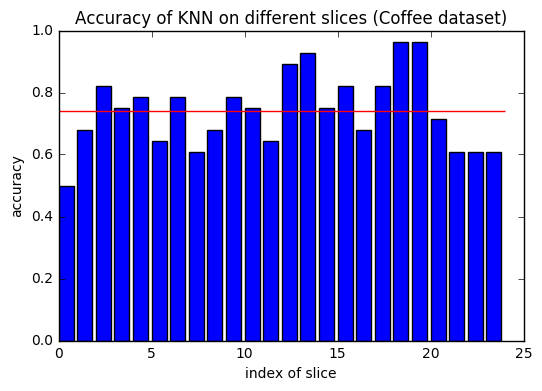

In [102]:
plt.bar(range(0,num), coffee_acc)
plt.hlines(np.mean(coffee_acc),0,num,color="r")
plt.title("Accuracy of KNN on different slices (Coffee dataset)")
plt.xlabel("index of slice")
plt.ylabel("accuracy")
plt.show()

### ECG Torso Data Set

In [31]:
ecg_train = pd.read_csv('ecg_test.csv', sep=',', header=None).astype(float)
ecg_train.replace([np.inf, -np.inf], np.nan).dropna()
ecg_train = ecg_train.loc[:186, :]
ecg_train_y = ecg_train.loc[:, 0]
ecg_train_x = ecg_train.loc[:, 1:]
ecg_test = pd.read_csv('ecg_train.csv', sep=',', header=None).astype(float)
ecg_test.replace([np.inf, -np.inf], np.nan).dropna()
ecg_test_y = ecg_test.loc[:, 0]
ecg_test_x = ecg_test.loc[:, 1:]

In [56]:
# splitting into bins
ecg_train_x_slices = []
ecg_test_x_slices = []
num2 = 17
for p in range(0,num2):
    ecg_train_x_slices.append(ecg_train_x.loc[:, p*len(ecg_train_x.columns)/num2:(p+1)*len(ecg_train_x.columns)/num2])
    ecg_test_x_slices.append(ecg_test_x.loc[:, p*len(ecg_test_x.columns)/num2:(p+1)*len(ecg_test_x.columns)/num2])

In [70]:
# training knn for different slices
ecg_acc = []
for q in range(0,num2):
    knn2 = KNN()
    knn2.fit(ecg_train_x_slices[q], ecg_train_y)
    ecg_acc.append(acc(ecg_test_y, knn2.predict(ecg_test_x_slices[q])))
    print('Accuracy KNN in slice %2i: %.2f' %(q+1, acc(ecg_test_y, knn2.predict(ecg_test_x_slices[q]))))

Accuracy KNN in slice  1: 0.50
Accuracy KNN in slice  2: 0.40
Accuracy KNN in slice  3: 0.42
Accuracy KNN in slice  4: 0.65
Accuracy KNN in slice  5: 0.40
Accuracy KNN in slice  6: 0.75
Accuracy KNN in slice  7: 0.68
Accuracy KNN in slice  8: 0.82
Accuracy KNN in slice  9: 0.75
Accuracy KNN in slice 10: 0.70
Accuracy KNN in slice 11: 0.65
Accuracy KNN in slice 12: 0.57
Accuracy KNN in slice 13: 0.47
Accuracy KNN in slice 14: 0.50
Accuracy KNN in slice 15: 0.50
Accuracy KNN in slice 16: 0.55
Accuracy KNN in slice 17: 0.55


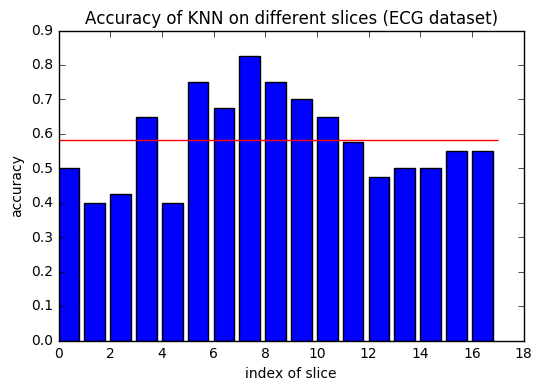

In [103]:
plt.bar(range(0,num2), ecg_acc)
plt.hlines(np.mean(ecg_acc),0,num2,color="r")
plt.title("Accuracy of KNN on different slices (ECG dataset)")
plt.xlabel("index of slice")
plt.ylabel("accuracy")
plt.show()